# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like HuggingFace Transformers, Streamlit, FastAPI, Docker and NGINX|
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## AWS EC2 with Boto3 Python Tutorial 

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html

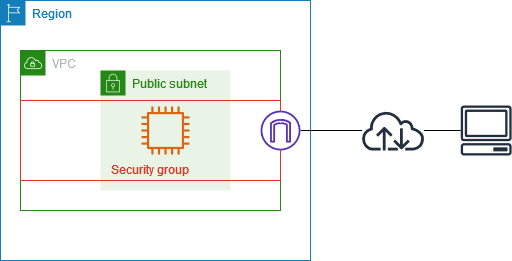

Amazon Elastic Compute Cloud (Amazon EC2) is a web service that provides resizeable computing capacity in servers in Amazon's data centers—that you use to build and host your software systems.

## Check if Instance is Present

In [ ]:
import boto3

ec2 = boto3.client('ec2')

response = ec2.describe_instances()

# instance_name = "mlops-kgptalkie"

instance_name = "vugiau"

instance_id="" 

for resp in response['Reservations']:
    resp = resp['Instances'][0]
    tags = resp.get('Tags', [])
    
    for tag in tags:
        if tag.get("Key", "")=="Name" and tag.get("Value", "")==instance_name:
            instance_id = resp['InstanceId']

if instance_id=="":
    print(f"No instance found with name {instance_name}")
    # raise("Stop here!!!")

instance_id

No instance found with name vu_mlops


''

## Create an Amazon EC2 instance

In [16]:
import boto3

ec2 = boto3.client('ec2')

if instance_id == "":
    response = ec2.run_instances(
        ImageId = 'ami-0286e9cb40286b991',
        MinCount=1,
        MaxCount=1,
        InstanceType='t2.micro',
        KeyName='vusamson131104',
        BlockDeviceMappings=[
            {
                "DeviceName": "/dev/xvda",
                'Ebs':{
                    'DeleteOnTermination': True,
                    'VolumeSize': 60
                }
            }
        ]

    )

    instance_id = response['Instances'][0]['InstanceId']

    ec2.create_tags(Resources=[instance_id], Tags=[
        {
            'Key':'Name',
            'Value':instance_name
        }
    ])

else:
    print("Instance is already present")

## Create Security Group and add rules to it
- Security groups control inbound and outbound traffic of the EC2 instance network interface.
- every EC2 instance must have at least one Security Group associated with it. If no Security Group has been specified during the EC2 instance launch, the default Security Group of the default VPC is associated with the instance.

In [17]:
group_name = 'vusamson'

response = ec2.describe_security_groups()

security_group_id = [x['GroupId'] for x in response['SecurityGroups'] if x['GroupName']==group_name]

if security_group_id == []:
    response = ec2.create_security_group(
        GroupName = group_name,
        Description = "Security group for testing"
    )
    security_group_id = response['GroupId']
else:
    security_group_id = security_group_id[0]

security_group_id

'sg-0a9a1fdb7124323e7'

In [18]:
from botocore.exceptions import ClientError

def update_security_group(group_id, protocol, port, cidr):
    try:
        response = ec2.authorize_security_group_ingress(
            GroupId = group_id,
            IpPermissions=[
                {
                    'IpProtocol': protocol,
                    'FromPort': port,
                    'ToPort': port,
                    'IpRanges': [{'CidrIp': cidr}]
                }
            ]
        )
    except ClientError as e:
        if e.response['Error']['Code']=='InvalidPermission.Duplicate':
            print('This rule is already there')
        else:
            print("an error as occured!")
            print(e)

update_security_group(security_group_id, 'tcp', 22, '0.0.0.0/0')
update_security_group(security_group_id, 'tcp', 80, '0.0.0.0/0')
update_security_group(security_group_id, 'tcp', 8501, '0.0.0.0/0')
update_security_group(security_group_id, 'tcp', 8502, '0.0.0.0/0')

This rule is already there
This rule is already there
This rule is already there
This rule is already there


In [19]:
ec2.modify_instance_attribute(InstanceId=instance_id, Groups=[security_group_id])

{'ResponseMetadata': {'RequestId': '82437b92-39ed-4e3e-a3fc-b8c7301b1e7d',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '82437b92-39ed-4e3e-a3fc-b8c7301b1e7d',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '235',
   'date': 'Sun, 16 Feb 2025 11:24:08 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

## Attach S3 Policy to EC2 Instance

In [ ]:
# # describe IAM role
# iam = boto3.client('iam')

# role_name = "ec2-s3-full-access"

# response = iam.get_role(RoleName=role_name)

# role_arn = response['Role']['Arn']

# role_arn

# # Ensure there is an instance profile with the same name as the role
# instance_profile_name = role_name
# try:
#     iam.get_instance_profile(InstanceProfileName=instance_profile_name)
# except iam.exceptions.NoSuchEntityException:
#     # Create an instance profile if it doesn't exist
#     iam.create_instance_profile(InstanceProfileName=instance_profile_name)
#     # Add role to the instance profile
#     iam.add_role_to_instance_profile(
#         InstanceProfileName=instance_profile_name,
#         RoleName=role_name
#     )

# # Attach the instance profile to the EC2 instance
# ec2.associate_iam_instance_profile(
#     IamInstanceProfile={
#         'Name': instance_profile_name
#     },
#     InstanceId=instance_id
# )

NoSuchEntityException: An error occurred (NoSuchEntity) when calling the GetRole operation: The role with name ec2-s3-full-access cannot be found.

### Terminate

In [ ]:
# import time

# def wait_for_status(instance_id, target_status):
#     while True:
#         response = ec2.describe_instances(InstanceIds=instance_id)

#         status = response['Reservations'][0]['Instances'][0]['State']['Name']

#         if status == target_status:
#             print("Instance is in {} state".format(target_status))
#             break
        
#         time.sleep(10)

# def terminate_instances(instance_id):
#     print("EC2 Instance Termination")
#     ec2.terminate_instances(InstanceIds=instance_id)

#     wait_for_status(instance_id, 'terminated')

# # terminate_instances([instance_id])